## Problem 2 - Knapsack

In [1]:
import mlrose
import numpy as np
import pandas as pd
from sklearn import metrics
from matplotlib import pyplot as plt
%matplotlib inline

weights = [10, 5, 2, 8, 15, 11, 12, 4, 9, 7, 1, 6, 4, 7, 12, 23, 1, 16, 7, 9, 20, 25, 22, 28, 25, 21, 22, 24, 29, 27, 21, 26, 24, 27, 12, 33, 31, 36, 37, 39]
values = [1, 2, 3, 4, 5, 3, 5, 4, 3, 2, 7, 4, 3, 1, 6, 3, 6, 1, 2, 1, 7, 8, 9, 9, 8, 7, 6, 5, 7, 6, 7, 7, 8, 9, 10, 8, 5, 6, 7, 9]
max_weight_pct = 0.6
fitness = mlrose.Knapsack(weights, values, max_weight_pct)
problem_fit = mlrose.DiscreteOpt(length = len(weights), fitness_fn=fitness)

/home/kellgon/.local/lib/python3.6/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


# Genetic

In [9]:
# define the parameter values that should be searched
pop_size=200
max_attempts = 1000

mutation_prob= 0.1

best_state, best_fitness, genetic_fitness_curve = mlrose.genetic_alg(problem_fit, mutation_prob = mutation_prob, pop_size=pop_size,
                                              max_attempts = max_attempts, random_state = 3, curve=True)
print("Mutation = ", mutation_prob)
print(best_state)
print(best_fitness)



Mutation =  0.1
[0 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1
 0 0 0]
153.0


# Random Hill

In [3]:
# Solve problem using the random hill climb
max_attempts = 1000
best_state, best_fitness, random_fitness_curve = mlrose.random_hill_climb(problem_fit,
                                              max_attempts = max_attempts, random_state = 3, curve=True)

print(best_state)
print(best_fitness)

[0 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1 0 1 1 0 1
 1 0 1]
143.0


# Simulated Annealing

In [4]:
# Solve problem using simulated annealing


schedule = mlrose.ArithDecay()
best_state, best_fitness, annealing_fitness_curve = mlrose.simulated_annealing(problem_fit, schedule=schedule,
                                              max_attempts = max_attempts, random_state = 3, curve=True)

print("Simulated annealing with ArithDecay")
print(best_state)
print(best_fitness)



Simulated annealing with ArithDecay
[0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 0 0 1 1 1 0 1 1 0 1
 1 0 1]
149.0


# MIMIC

In [5]:
# Solve problem using mimic
pop_size=200 
max_attempts=100
keep_pct=0.3 

best_state, best_fitness, mimic_fitness_curve = mlrose.mimic(problem_fit, pop_size=pop_size, keep_pct=keep_pct,
                                              max_attempts = max_attempts, random_state = 3, curve=True)
print("MIMIC with Keep_PCT of ", keep_pct)
print(best_state)
print(best_fitness)



MIMIC with Keep_PCT of  0.3
[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0
 0 0 0]
161.0


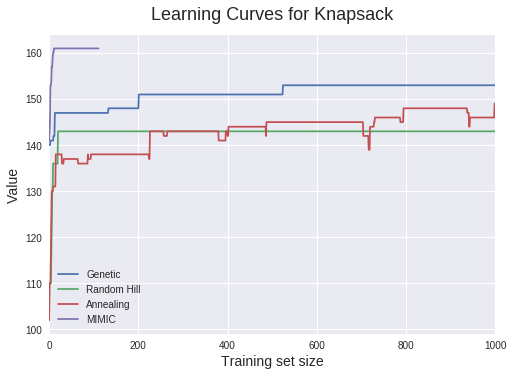

In [11]:
plt.style.use('seaborn')
plt.plot(genetic_fitness_curve, label='Genetic')
plt.plot(random_fitness_curve, label='Random Hill')
plt.plot(annealing_fitness_curve, label='Annealing')
plt.plot(mimic_fitness_curve, label='MIMIC')

plt.xlim(0,1000)

plt.ylabel('Value', fontsize=14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning Curves for Knapsack', fontsize=18, y=1.03)
plt.legend()